In [144]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Set executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [145]:
# Get the Mars temperature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [146]:
# Extract table using Pandas read HTML
mars_df = pd.read_html(url)[0]

In [147]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [148]:
# Convert date to 'datetime'
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [149]:
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [182]:
# 6. How many months exist on Mars
mars_df['month'].nunique()


12

In [151]:
# 7. How many days of data are for Mars
mars_df['sol'].max()

1977

In [188]:
# 8. What are the coldest and warmest months on Mars
min_temp = mars_df.groupby('month', as_index=False).mean().sort_values('month')
min_temp

,month,id,sol,ls,min_temp,pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [190]:
# 8. continued...coldest and warmest months
mars_df.loc[(mars_df['min_temp'] == mars_df['min_temp'].min())| 
            (mars_df['min_temp'] == mars_df['min_temp'].max())]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1093,1119,2015-12-09,1188,79,3,-90.0,881.0
1582,1614,2017-05-10,1692,2,1,-62.0,820.0


In [198]:
# 8 continued...plot as bar chart
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator


Text(0, 0.5, 'Temperature')

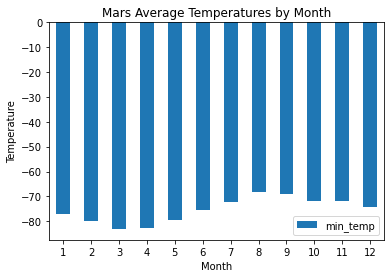

In [199]:
min_temp_df = pd.DataFrame(min_temp)
min_temp_df.plot.bar(x='month', y='min_temp', rot=0)
plt.title("Mars Average Temperatures by Month")
plt.xlabel("Month")
plt.ylabel("Temperature")

In [201]:
# 9. What months have the highest and lowest pressure points
pressure = mars_df.groupby('month', as_index=False).mean().sort_values('month')
pressure

,month,id,sol,ls,min_temp,pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [202]:
# 9. continued...highest and lowest pressure points
mars_df.loc[(mars_df['pressure'] == mars_df['pressure'].min())| 
            (mars_df['pressure'] == mars_df['pressure'].max())]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
156,80,2013-01-27,170,252,9,-66.0,925.0
157,81,2013-01-28,171,253,9,-67.0,925.0
766,785,2014-12-23,846,257,9,-74.0,925.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


Text(0, 0.5, 'Pressure')

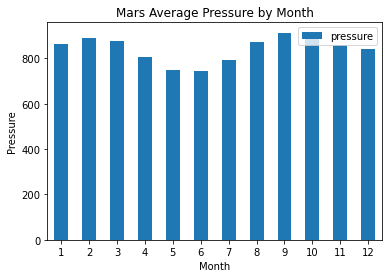

In [207]:
# 9 continued...bar chart
pressure_df = pd.DataFrame(pressure)
pressure_df.plot.bar(x='month', y='pressure', rot=0)
plt.title("Mars Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Pressure")

In [209]:
# 10 How many earth days exist in a Martian year
mars_df['terrestrial_date'].nunique()

1867

In [211]:
daily_min_temp = mars_df.groupby('terrestrial_date', as_index=False).mean().sort_values('terrestrial_date')
daily_min_temp

,terrestrial_date,id,sol,ls,month,min_temp,pressure
0,2012-08-16,2.0,10.0,155.0,6.0,-75.0,739.0
1,2012-08-17,13.0,11.0,156.0,6.0,-76.0,740.0
2,2012-08-18,24.0,12.0,156.0,6.0,-76.0,741.0
3,2012-08-19,35.0,13.0,157.0,6.0,-74.0,732.0
4,2012-08-20,46.0,14.0,157.0,6.0,-74.0,740.0
...,...,...,...,...,...,...,...
1862,2018-02-23,1889.0,1973.0,133.0,5.0,-78.0,730.0
1863,2018-02-24,1892.0,1974.0,134.0,5.0,-77.0,729.0
1864,2018-02-25,1894.0,1975.0,134.0,5.0,-76.0,729.0
1865,2018-02-26,1893.0,1976.0,135.0,5.0,-77.0,728.0


Text(0, 0.5, 'Minimum Tempreature')

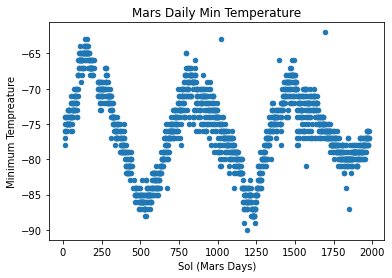

In [218]:
# 10 continued...plot daily minimum temp
daily_temp_df = pd.DataFrame(daily_min_temp)
daily_temp_df.plot.scatter(x='sol', y='min_temp', rot=0)
plt.title("Mars Daily Min Temperature")
plt.xlabel("Sol (Mars Days)")
plt.ylabel("Minimum Tempreature")


In [219]:
# Export the DataFrame as a CSV file (encoding='utf-8' by default on Python 3)
file_name = './Data/mars_data.csv'
mars_df.to_csv(file_name, index=False)